In [37]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dat
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
tickersBigCap = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
end = dat.datetime.now()
start = end - dat.timedelta(days=365*5)
data = yf.download(tickersBigCap, start=start, end=end, group_by='ticker')
data = data.stack(level=0)
data.index = data.index.reorder_levels(['Ticker', 'Date'])
data = data.sort_index()          

C:\Users\mpjau\AppData\Local\Temp\ipykernel_18512\54365369.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickersBigCap, start=start, end=end, group_by='ticker')
[*********************100%***********************]  5 of 5 completed
C:\Users\mpjau\AppData\Local\Temp\ipykernel_18512\54365369.py:5: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data = data.stack(level=0)


In [39]:
df = pd.DataFrame({
    'Close': data['Close']
    })

In [54]:
df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1)).dropna()

In [55]:
df

Close  LogReturn
Ticker Date                             
AAPL   2020-06-17   85.442436        NaN
       2020-06-18   85.476471   0.000398
       2020-06-19   84.987991  -0.005731
       2020-06-22   87.211601   0.025827
       2020-06-23   89.073128   0.021120
...                       ...        ...
MSFT   2025-06-09  472.750000   0.005026
       2025-06-10  470.920013  -0.003878
       2025-06-11  472.619995   0.003603
       2025-06-12  478.869995   0.013137
       2025-06-13  474.959991  -0.008199

[6275 rows x 2 columns]

In [71]:
top10 = logreturn.sort_values(ascending=True).head(10).tolist()
print(top10)

[-1.3000282544051691, -0.08029542508656962, -0.06394860489846334, -0.06380179009095528, -0.06243686428014475, -0.05654730422193248, -0.05561395588688599, -0.05219151126106567, -0.05083702387538248, -0.04659863699194502]


In [79]:
index_to_drop = df[df['LogReturn'] == -1.3000282544051691].index
df = df.drop(index_to_drop)

In [80]:
df.loc['MSFT']

,Close,LogReturn
Date,,
2020-06-18,188.091385,0.010652
2020-06-19,186.970367,-0.005978
2020-06-22,192.163208,0.027395
2020-06-23,193.447128,0.006659
2020-06-24,189.547653,-0.020364
...,...,...
2025-06-09,472.750000,0.005026
2025-06-10,470.920013,-0.003878
2025-06-11,472.619995,0.003603


In [82]:
tickToAnalyse = 'MSFT'
logreturn = df.loc[tickToAnalyse]['LogReturn'].dropna()
print(logreturn)

Date
2020-06-18    0.010652
2020-06-19   -0.005978
2020-06-22    0.027395
2020-06-23    0.006659
2020-06-24   -0.020364
                ...   
2025-06-09    0.005026
2025-06-10   -0.003878
2025-06-11    0.003603
2025-06-12    0.013137
2025-06-13   -0.008199
Name: LogReturn, Length: 1254, dtype: float64


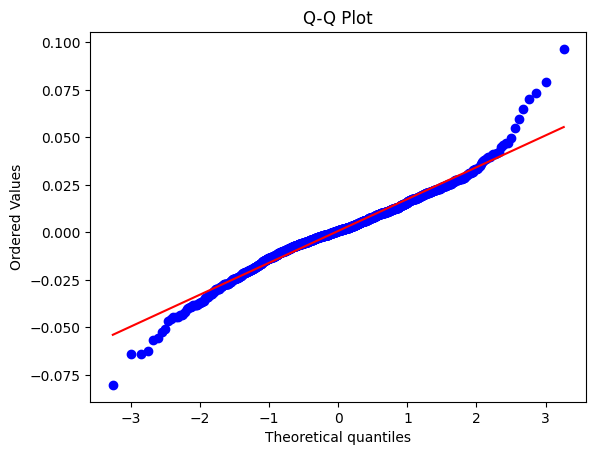

In [83]:
stats.probplot(logreturn, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [84]:
stat, p = stats.shapiro(logreturn)
print(f'Shapiro-Wilk Test: p-value = {p}')

normalized = (logreturn - logreturn.mean()) / logreturn.std()
stat, p = stats.kstest(normalized, 'norm')
print(f'Kolmogorov-Smirnov Test: p-value = {p}')

result = stats.anderson(logreturn, dist='norm')
print(f'Anderson-Darling Test Statistic: {result.statistic}')
for crit, sig in zip(result.critical_values, result.significance_level):
    print(f'At {sig}% significance level, critical value = {crit}')

Shapiro-Wilk Test: p-value = 1.7083235467797287e-14
Kolmogorov-Smirnov Test: p-value = 0.0006591918635579999
Anderson-Darling Test Statistic: 6.499986390500453
At 15.0% significance level, critical value = 0.574
At 10.0% significance level, critical value = 0.654
At 5.0% significance level, critical value = 0.785
At 2.5% significance level, critical value = 0.915
At 1.0% significance level, critical value = 1.089


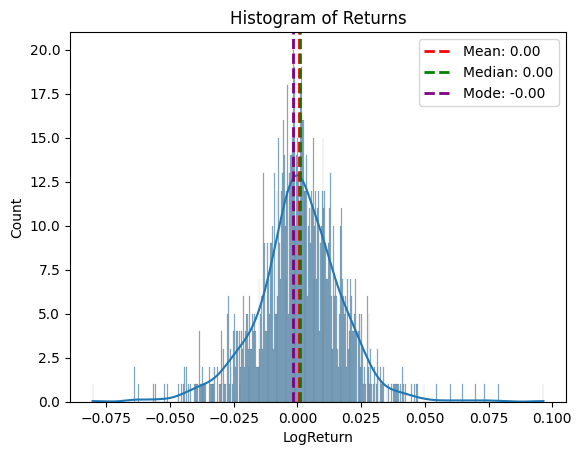

In [85]:
mean_val = np.mean(logreturn)
median_val = np.median(logreturn)
counts, bins = np.histogram(logreturn, bins=500)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
hist_mode = bin_centers[np.argmax(counts)]




sns.histplot(logreturn, bins=500, kde=True)
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(hist_mode, color='purple', linestyle='--', linewidth=2, label=f'Mode: {hist_mode:.2f}')
plt.title('Histogram of Returns')
plt.legend()
plt.show()